#### 参考链接
[1. Infectious Disease Modelling: Beyond the Basic SIR Model](https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4) <br>
[2. Corresponding github](https://github.com/henrifroese/infectious_disease_modelling) <br>
[3. Infectious Disease Modelling: Fit Your Model to Coronavirus Data-20.4.20](https://towardsdatascience.com/infectious-disease-modelling-fit-your-model-to-coronavirus-data-2568e672dbc7)

$$
\overrightarrow { \text {rate}  \cdot \text { probability } \cdot \text { population }}
$$
<font color=#DC143C> rate </font> * <font color=#0000FF> probability </font> * <font color=#32CD32> population </font>

### SEIR
![](https://miro.medium.com/max/875/1*B-HZLpVWEgAZ3iloHBJjCA.png)
$$
\begin{aligned}
\frac{d S}{d t} &=-\beta \cdot I \cdot \frac{S}{N} \\
\frac{d E}{d t} &=\beta \cdot I \cdot \frac{S}{N}-\delta \cdot E \\
\frac{d I}{d t} &=\delta \cdot E-\gamma \cdot I \\
\frac{d R}{d t} &=\gamma \cdot I
\end{aligned}
$$


### SEIRD
![](https://miro.medium.com/max/875/1*TIZaRpt70TR1RFtf2dmlew.png)
$$
\begin{aligned}
\frac{d S}{d t} &=-\beta \cdot I \cdot \frac{S}{N} \\
\frac{d E}{d t} &=\beta \cdot I \cdot \frac{S}{N}-\delta \cdot E \\
\frac{d I}{d t} &=\delta \cdot E-(1-\alpha) \cdot \gamma \cdot I-\alpha \cdot \rho \cdot I \\
\frac{d R}{d t} &=(1-\alpha) \cdot \gamma \cdot I \\
\frac{d D}{d t} &=\alpha \cdot \rho \cdot I
\end{aligned}
$$


Individuals are first susceptible — they can catch Coronavirus (with probability S/N) and become exposed. They cannot yet spread the virus. After some days (1/δ, to be exact), they are infected and spread the virus. Over the course of the infection, they can either die (over 1/ρ days, with probability α) or survive and finally recover (after 1/γ days)


- $\mathrm{N}$ : total population
- $\mathrm{S}(\mathrm{t})$ : number of people susceptible on day t
- $\mathrm{E}(\mathrm{t})$ : number of people exposed on day t
- $\mathrm{I}(\mathrm{t})$ : number of people infected on day t
- $\mathrm{R}(\mathrm{t})$ : number of people recovered on day t
- $\mathrm{D}(\mathrm{t})$ : number of people dead on day t 
- $\boldsymbol{\beta}$ : expected amount of people an infected person infects per day
- $\mathrm{D}$ : number of days an infected person has and can spread the disease
- $\boldsymbol{\gamma}$ : the proportion of infected recovering per day $(\mathrm{\gamma}=1 / \mathrm{D})$
- $\mathrm{R_0}$: the total number of people an infected person infects ($\mathrm{R_0}=\beta / \mathrm{\gamma}$ )
- $\boldsymbol{\delta}$: length of incubation period
- $\boldsymbol{\alpha}$ : fatality rate
- $\boldsymbol{\rho}$ : rate at which people die $(=1 /$ days from infected until death)

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3 # pip install mpld3
mpld3.enable_notebook()

In [2]:
def plotseird(t,S,E,I,R,D=None, L=None, R0=None, Alpha=None, CFR=None):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha = 0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha = 0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha = 0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha = 0.7, linewidth=2, label='Recovered')
    if D is not None:
        ax.plot(t, D, 'k', alpha = 0.7, linewidth=2, label='Dead')
        ax.plot(t, S+E+I+R+D, 'c--', alpha = 0.7, linewidth=2, label='Total')
    else:
        ax.plot(t, S+E+I+R, 'c--', alpha = 0.7, linewidth=2, label='Total')
    
    ax.set_xlabel('Time (days)')
    
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom','left'):
        ax.spines[spine].set_visible(False)
        
    if L is not None:
        plt.title('Lockdown after {} days'.format(L))
    plt.show()
    
    if R0 is not None or CFR is not None:
        f = plt.figure(figsize=(12,4))
    
    if R0 is not None:
        ax1 = f.add_subplot(121)
        ax1.plot(t, R0, 'b--', alpha = 0.7, linewidth=2, label='R_0')
    
        ax1.set_xlabel('Time (days)')
        ax1.title.set_text('R_0 over time')
        
        ax1.yaxis.set_tick_params(length=0)
        ax1.xaxis.set_tick_params(length=0)
        ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax1.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    if Alpha is not None:
        ax2 = f.add_subplot(122)
        ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

        ax2.set_xlabel('Time (days)')
        ax2.title.set_text('fatality rate over time')
        ax2.yaxis.set_tick_params(length=0)
        ax2.xaxis.set_tick_params(length=0)
        ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax2.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

        plt.show();


### Programming the Exposed-Compartment

In [3]:
def SEIR(y,t,N, beta, gamma, delta):
    S,E,I,R = y
    dSdt = - beta*S*I / N
    dEdt = beta*S*I / N - delta*E
    dIdt = delta*E - gamma*I
    dRdt = gamma*I
    return dSdt,dEdt,dIdt,dRdt

In [4]:
N = 1000000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0 # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed

In [5]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret1 = odeint(SEIR, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret1.T

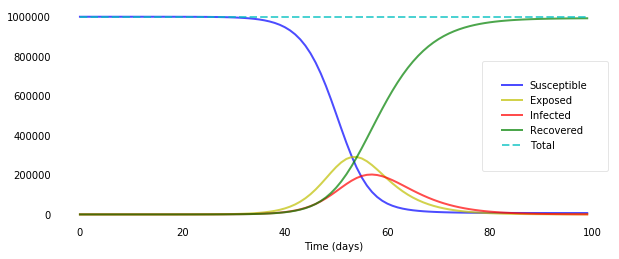

In [6]:
plotseird(t, S, E, I, R)

### Programming the dead-Compartment

In [7]:
def SEIRD(y,t,N,beta,gamma,delta,alpha,rho):
    S,E,I,R,D = y
    dSdt = - beta*S*I / N
    dEdt = beta*I*S / N - delta*E
    dIdt = delta*E - (1-alpha)*gamma*I - alpha*rho*I
    dRdt = (1-alpha)*gamma*I
    dDdt = alpha*rho*I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [8]:
alpha = 0.2  # 20% death rate
rho = 1/9    # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [9]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret2 = odeint(SEIRD, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret2.T

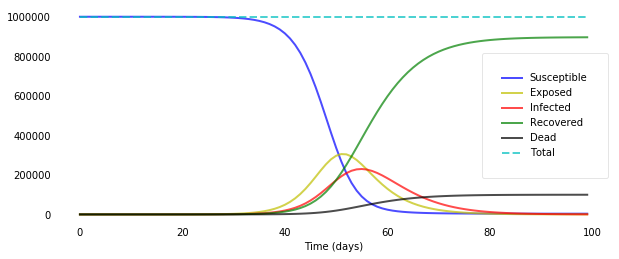

In [10]:
plotseird(t, S, E, I, R, D)

### Time-Dependent $R_{0}$ 
- Simple Approach: Single Lockdown

In [11]:
def SEIRD_R0(y,t,N,beta,gamma,delta,alpha,rho):
    S,E,I,R,D = y
    dSdt = - beta(t)*S*I / N
    dEdt = beta(t)*I*S / N - delta*E
    dIdt = delta*E - (1-alpha)*gamma*I - alpha*rho*I
    dRdt = (1-alpha)*gamma*I
    dDdt = alpha*rho*I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [12]:
L = 40  # 40天隔离
def R_0(t):
    return 5.0 if t<L else 0.9
def beta(t):
    return R_0(t) * gamma


In [13]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret3 = odeint(SEIRD_R0, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret3.T

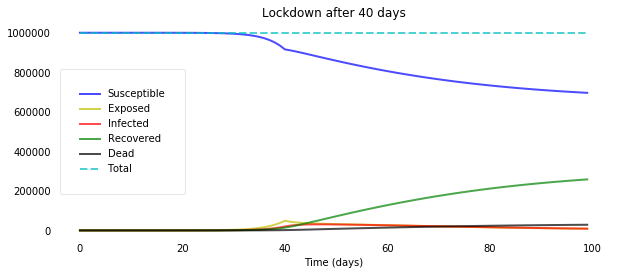

In [14]:
plotseird(t, S, E, I, R, D, L)

### Advanced Approach: logistic $R_{0}$

#### [$R_0$ logistic function ](https://en.wikipedia.org/wiki/Logistic_function)
$$
R_{0}(t)=\frac{R_{0_{s t a r t}}-R_{0_{e n d}}}{1+e^{-k\left(-t+x_{0}\right)}}+R_{0_{e n d}}
$$

- $R_{0_{start}}$ and $R_{0_{end}}$ are the values of $R_0$ on the first and the last day
- $x_0$ is the x-value of the inflection point (i.e. the date of the steepest decline in $R_0$, this could be thought of as the main “lockdown” date)
- $k$ lets us vary how quickly $R_0$ declines

In [15]:
R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5  # k=0.1, 0.5, 1.0 ... 

def logistic_R_0(t):
    return (R_0_start - R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma


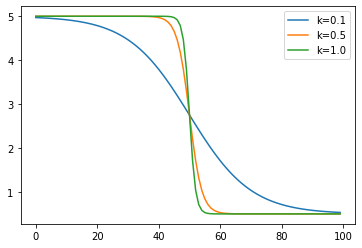

In [16]:
# 不同的k值影响 R0 曲线
k =0.1
t = np.linspace(0, 99, 100)
y1 = logistic_R_0(t)
plt.plot(t, y1)

k = 0.5 
y2 = logistic_R_0(t)
plt.plot(t, y2)

k = 1.0
y3 = logistic_R_0(t)
plt.plot(t, y3)
plt.legend(['k=0.1', 'k=0.5', 'k=1.0'])  # 设置图表符号说明
plt.show()

In [17]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret4 = odeint(SEIRD_R0, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret4.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values

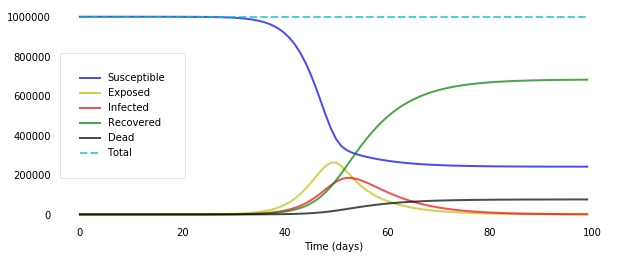

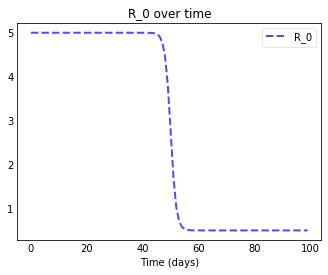

In [18]:
plotseird(t, S, E, I, R, D, R0=R0_over_time)

### $a(t)$ :  Resource- and Age-Dependent Fatality Rate
- 死亡率变化：时滞微分方程，这里考虑与年龄和医护资源有关
$$
\alpha(t)=s \cdot \frac{I(t)}{N}+\alpha_{O P T}
$$


In [19]:
def SEIR_R(y, t, N, beta, gamma, delta, alpha_opt, rho):
    S,E,I,R,D = y
    def alpha(t):
        return s * I / N + alpha_opt
    dSdt = - beta(t)*S*I / N
    dEdt = beta(t)*I*S / N - delta*E
    dIdt = delta*E - (1-alpha(t))*gamma*I - alpha(t)*rho*I
    dRdt = (1-alpha(t))*gamma*I
    dDdt = alpha(t)*rho*I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [20]:
# alpha_by_agegroup = { "0-29": 0.01, "30-59": 0.05, "60-89": 0.20, "89+": 0.30}
# proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
# proportion_of_agegroup = {"0-29": 0.4, "30-59": 0.4, "60-89": 0.1, "89+": 0.1}
# a = 0.01 ⋅ 0.1 + 0.05 ⋅ 0.3 + 0.2 ⋅ 0.4 + 0.3 ⋅ 0.2 = 15.6%

In [21]:
alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

In [22]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(SEIR_R, y0, t, args=(N, beta, gamma, delta, alpha_opt, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

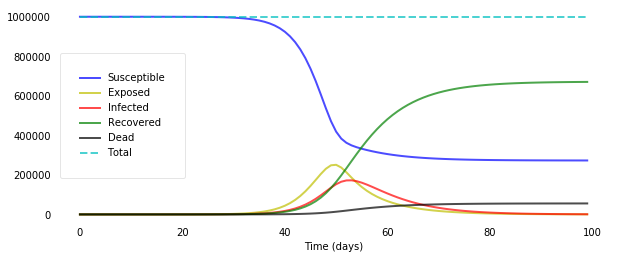

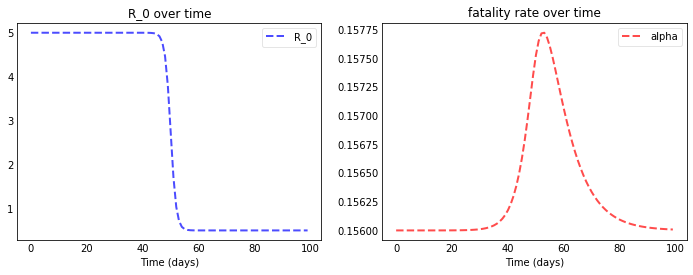

In [23]:
plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time)

## SECIRD Model
- Add one new compartment: $\text {Critical}$, for individuals that need intensive care. This will allow us to model overflowing hospitals. 
- Number of days from infected to critical: 12 (→rate: 1/12)
- Number of days from critical to dead: 7.5 (→rate: 1/7.5)
- Number of days from critical to recovered: 6.5 (→rate: 1/6.5)

from C, there are two populations we have to look at: max(0, C-B) people die because of shortages, and the rest get treated like we derived above. What’s the rest? Well, if C<B (enough beds), then C people get treated. If C>B (not enough beds), then B people get treated. That means that “the rest” — the amount of people getting treatment — is min(B, C) (again, if C<B, then min(B, C)=C people get treatment; if C>B, then min(B, C)=B people get treatment; the math checks out).<br>
![SECIRD](./data/SEICRD-.png)

$$
\begin{aligned}
\frac{d S}{d t} &=-\beta(t) \cdot I \cdot \frac{S}{N} \\
\frac{d E}{d t} &=\beta(t) \cdot I \cdot \frac{S}{N}-\delta \cdot E \\
\frac{d I}{d t} &=\delta \cdot E-\frac{1}{12} \cdot p(I \rightarrow C) \cdot I-\gamma \cdot(1-p(I \rightarrow C)) \cdot I \\
\frac{d C}{d t} &=\frac{1}{12} \cdot p(I \rightarrow C) \cdot I-\frac{1}{7.5} \cdot p(C \rightarrow D) \cdot \min (B e d s(t), C)-\max (0, C-B e d s(t))-\frac{1}{6.5} \cdot(1-p(C \rightarrow D)) \cdot \min (B e d s(t), C) \\
\frac{d R}{d t} &=\gamma \cdot(1-p(I \rightarrow C)) \cdot I+\frac{1}{6.5} \cdot(1-p(C \rightarrow D)) \cdot \min (B e d s(t), C) \\
\frac{d D}{d t} &=\frac{1}{7.5} \cdot p(C \rightarrow D) \cdot \min (B e d s(t), C)+\max (0, C-B e d s(t))
\end{aligned}
$$

$R_0(t)$ and $Beds(t)$ function:
- s is some scaling factor (s=0.01)
$$
R_{0}(t)=\frac{R_{0_{s t a r t}}-R_{0_{e n d}}}{1+e^{-k\left(-t+x_{0}\right)}}+R_{0_{e n d}}
$$
$$
\operatorname{Beds} (t)=B e d s_{0}+s \cdot t \cdot B e d s_{0}
$$

- N: total population
- $\beta(t)$: expected amount of people an infected person infects per day
- $\gamma$: the proportion of infected recovering per day $(\gamma=1 / D)$
- Beds₀ :(parameter in $\operatorname{Ro}(t)$), look up the number of ICU beds in a region
-  $\delta$: length of incubation period
   
#### below these parameters to fit
- $\mathrm{p}(\mathrm{I} \rightarrow \mathrm{C})$
- $\mathrm{p}(\mathrm{C} \rightarrow \mathrm{D})$
- $\mathbf{R_{0}\_start}$  (parameter in Ro(t))
- $\mathbf{R_{0}\_end}$  (parameter in Ro(t))
- $\mathbf{x_0}$ (parameter in Ro(t))
- $\mathbf{k}$  (parameter in Ro(t))
- $\mathbf{s}$ (parameter in Beds(t))

In [24]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None # default = 'warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import mpld3 
mpld3.enable_notebook()

from scipy.integrate import odeint
import lmfit  # 带边界和约束的最小二乘极小化
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

### Curve fitting Example
- fit the following curve

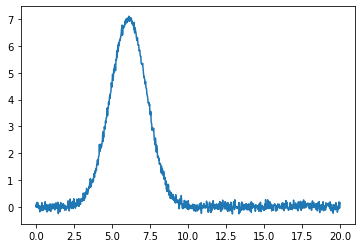

In [25]:
np.random.seed(42)
x = np.linspace(0,20.0, 1001)

# normal distribution.  +  with some noise
data = (gaussian(x, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size = x.size))  
plt.plot(x, data)

In [26]:
# def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
#     """Return a 1-dimensional Gaussian function.
#     gaussian(x, amplitude, center, sigma) =
#         (amplitude/(s2pi*sigma)) * exp(-(1.0*x-center)**2 / (2*sigma**2))
#     """
#     return ((amplitude/(max(tiny, s2pi*sigma)))
#             * exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))

# def lorentzian(x, amplitude=1.0, center=0.0, sigma=1.0):
#     """Return a 1-dimensional Lorentzian function.
#     lorentzian(x, amplitude, center, sigma) =
#         (amplitude/(1 + ((1.0*x-center)/sigma)**2)) / (pi*sigma)
#     """
#     return ((amplitude/(1 + ((1.0*x-center)/max(tiny, sigma))**2))
#             / max(tiny, (pi*sigma)))

define a function that takes x as the first argument, and then the parameters to be fitted (a, b, c)

In [27]:
def f(x,a,b,c):
    return gaussian(x,a,b,c)

# set the parameters (and some initial parameter guesses)
mod = lmfit.Model(f)
mod.set_param_hint('a',value=10.0, vary=True)
mod.set_param_hint('b',value=10.0, vary=True)
mod.set_param_hint('c',value=10.0, vary=True)

params = mod.make_params()
# print(params)

In [28]:
result = mod.fit(data, params, method='leastsq', x=x) # fitting
print(result)

{'a': 21.032607053235708, 'b': 6.100343154233262, 'c': 1.2009255088627309}

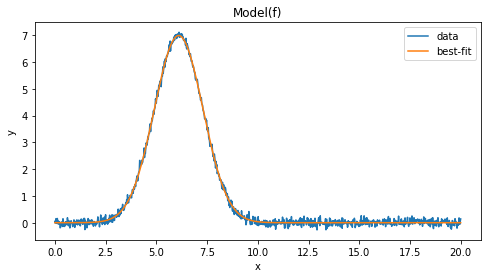

In [29]:
plt.figure(figsize=(8,4))
result.plot_fit(datafmt='-')
result.best_values

In [30]:
result

### Supplemental and Coronavirus Data

In [31]:
# beds = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/beds.csv", header=0)
# agegroups = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/agegroups.csv")
# probabilities = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/probabilities.csv")
# covid_data = pd.read_csv("https://tinyurl.com/t59cgxn", parse_dates=["Date"], skiprows=[1])

In [32]:
beds = pd.read_csv("./data/beds.csv", header=0)
agegroups = pd.read_csv("./data/agegroups.csv")
probabilities = pd.read_csv("./data/probabilities.csv")
covid_data = pd.read_csv("./data/time_series_covid19_deaths_global_narrow.csv",  
                         parse_dates=['Date'], skiprows=[1])
covid_data['Location'] = covid_data['Country/Region']

covid_data

,Province/State,Country/Region,Lat,Long,Date,Value,ISO 3166-1 Alpha 3-Codes,Region Code,Sub-region Code,Intermediate Region Code,Location
0,NaN,Afghanistan,33.939110,67.709953,2020-11-05,1554,AFG,142.0,34.0,NaN,Afghanistan
1,NaN,Afghanistan,33.939110,67.709953,2020-11-04,1548,AFG,142.0,34.0,NaN,Afghanistan
2,NaN,Afghanistan,33.939110,67.709953,2020-11-03,1544,AFG,142.0,34.0,NaN,Afghanistan
3,NaN,Afghanistan,33.939110,67.709953,2020-11-02,1541,AFG,142.0,34.0,NaN,Afghanistan
4,NaN,Afghanistan,33.939110,67.709953,2020-11-01,1536,AFG,142.0,34.0,NaN,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
77447,NaN,Zimbabwe,-19.015438,29.154857,2020-01-26,0,ZWE,2.0,202.0,14.0,Zimbabwe
77448,NaN,Zimbabwe,-19.015438,29.154857,2020-01-25,0,ZWE,2.0,202.0,14.0,Zimbabwe
77449,NaN,Zimbabwe,-19.015438,29.154857,2020-01-24,0,ZWE,2.0,202.0,14.0,Zimbabwe
77450,NaN,Zimbabwe,-19.015438,29.154857,2020-01-23,0,ZWE,2.0,202.0,14.0,Zimbabwe


In [33]:
# print(beds)
# print(agegroups)
# print(probabilities)

beds_lookup = dict(zip(beds['Country'], beds['ICU_Beds']))
agegroups_lookup = dict(zip(agegroups['Location'], agegroups[['0_9','10_19','20_29','30_39','40_49','50_59','60_69','70_79','80_89','90_100']].values))

prob_I_to_C_1 = list(probabilities.prob_I_to_ICU_1.values)
prob_I_to_C_2 = list(probabilities.prob_I_to_ICU_2.values)
prob_C_to_Death_1 = list(probabilities.prob_ICU_to_Death_1.values)
prob_C_to_Death_2 = list(probabilities.prob_ICU_to_Death_2.values)

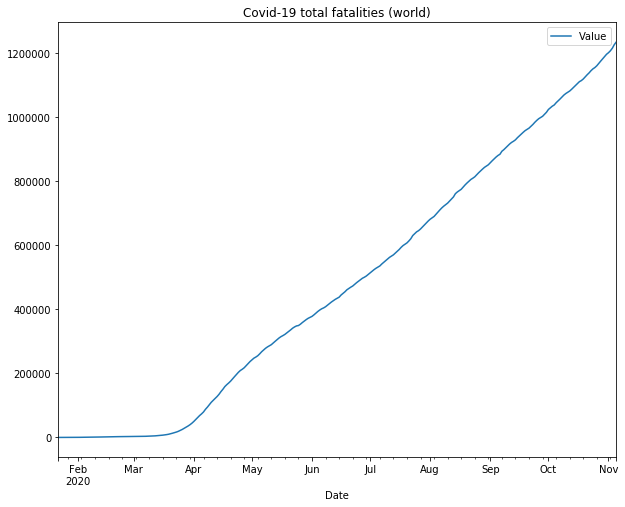

In [34]:
covid_data.groupby('Date').sum()[["Value"]].plot(figsize=(10, 8), title="Covid-19 total fatalities (world)")  #[['Value']] 双中括号变为dataframe

### Plotting

In [35]:
plt.gcf().subplots_adjust(bottom=0.15)
def plotter(t, S, E, I, C, R, D, R_0, B, S_1=None, S_2=None, x_ticks=None):
    if S_1 is not None and S_2 is not None:
        print(f'perventage going to ICU: {S_1*100}; percentage dying in ICU: {S_2*100}')
    
    f,ax = plt.subplots(1,1, figsize=(20,8))
    if x_ticks is None:
        ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(t, C, 'r--', alpha=0.7, linewidth=2, label='Critical')
        ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    else:
        ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(t, C, 'r--', alpha=0.7, linewidth=2, label='Critical')
        ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
        
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        f.autofmt_xdate()
    
    ax.title.set_text('extened SEIR-model')    
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top','right','bottom','left'):
        ax.spines[spine].set_visible(False)
    
    plt.show()
    
    
    f = plt.figure(figsize=(20,8))  #画布
    #sp1
    ax1 = f.add_subplot(131)
    if x_ticks is None:
        ax1.plot(t, R_0, 'b--',alpha=0.7, linewidth=2, label='R_0')
    else:
        ax1.plot(x_ticks, R_0, 'b--',alpha=0.7, linewidth=2, label='R_0')
        ax1.xaxis.set_major_locator(mdates.YearLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax1.xaxis.set_major_locator(mdates.MonthLocator())
        f.autofmt_xdate()
    ax1.title.set_text('R_0 over time')
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top','right','bottom','left'):
        ax.spines[spine].set_visible(False)
    
    #sp2
    ax2 = f.add_subplot(132)
    total_CFR = [0] + [100 * D[i] / sum(sigma*E[:i]) if sum(sigma*E[:i]) > 0 else 0 for i in range(1,len(t))]
    daily_CFR = [0] + [100 * ((D[i] - D[i-1]) / ((R[i] - R[i-1]) + (D[i]-D[i-1])))  \
                      if max((R[i] - R[i-1]), (D[i] - D[i-1])) > 10 else 0 for i in range(1, len(t))]
    if x_ticks is None:
        ax2.plot(t, total_CFR, 'r--',alpha=0.7, linewidth=2, label='total')
        ax2.plot(t, daily_CFR, 'b--',alpha=0.7, linewidth=2, label='daily')
    else:
        ax2.plot(x_ticks, total_CFR, 'r--', alpha=0.7, linewidth=2, label='total')
        ax2.plot(x_ticks, daily_CFR, 'b--', alpha=0.7, linewidth=2, label='daily')
        ax2.xaxis.set_major_locator(mdates.YearLocator())
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax2.xaxis.set_major_locator(mdates.MonthLocator())
        f.autofmt_xdate()
    ax2.title.set_text('Fatality Rate (%)')
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top','right','bottom','left'):
        ax.spines[spine].set_visible(False)
    
    #sp3
    ax3 = f.add_subplot(133)
    newDs = [0] + [D[i] - D[i-1] for i in range(1, len(t))] 
    if x_ticks is None:
        ax3.plot(t, newDs, 'r--',alpha=0.7, linewidth=2, label='total')
        ax3.plot(t, [max(0, C[i]-B(i)) for i in range(len(t))], 'b--',alpha=0.7, linewidth=2, label='over capacity')
    else:
        ax3.plot(t, newDs, 'r--',alpha=0.7, linewidth=2, label='total')
        ax3.plot(t, [max(0, C[i]-B(i)) for i in range(len(t))], 'b--',alpha=0.7, linewidth=2, label='over capacity')
        ax3.xaxis.set_major_locator(mdates.YearLocator())
        ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax3.xaxis.set_major_locator(mdates.MonthLocator())
        f.autofmt_xdate()
    ax3.title.set_text('Death per day')
    ax3.yaxis.set_tick_params(length=0)
    ax3.xaxis.set_tick_params(length=0)
    ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax3.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top','right','bottom','left'):
        ax.spines[spine].set_visible(False)
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [36]:
def SECIRD(y,t,beta, gamma, sigma, N, p_I_to_C, p_C_to_D, Beds):
    S,E,C,I,R,D = y
    
    dSdt = -beta(t) * I * S / N
    dEdt = beta(t) * I * S / N - sigma * E
    dIdt = sigma * E - 1/12.0*p_I_to_C*I - gamma*(1-p_I_to_C)*I
    dCdt = 1/12.0*p_I_to_C*I - 1/7.5*p_C_to_D*min(Beds(t), C) - max(0,C-Beds(t)) - 1/6.5*(1-p_C_to_D)*min(Beds(t),C)
    dRdt = gamma*(1-p_I_to_C)*I + 1/6.5*(1-p_C_to_D)*min(Beds(t), C)
    dDdt = 1/7.5*p_C_to_D*min(Beds(t),C) + max(0,C-Beds(t))
    
    return dSdt, dEdt, dIdt, dCdt, dRdt, dDdt    

In [37]:
gamma = 1/9.0
sigma = 1/3.0

def _logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start - R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def Model(days, agegroups, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s):
    def beta(t):
        return _logistic_R_0(t, R_0_start, k, x0, R_0_end)*gamma
    N = sum(agegroups)
    
    def Beds(t):
        beds_0 = beds_per_100k / 100000 * N
        return beds_0 + s*beds_0*t 
    y0 = N-1.0, 1.0, 0.0, 0.0, 0.0, 0.0
    t = np.linspace(0, days-1, days)
    ret5 = odeint(SECIRD, y0, t, args=(beta, gamma, sigma, N, prob_I_to_C, prob_C_to_D, Beds))
    S,E,I,C,R,D = ret5.T
    R_0_over_time = [beta(i) for i in range(len(t))]
    
    return t, S, E, I, C, R, D, R_0_over_time, Beds, prob_I_to_C, prob_C_to_D

perventage going to ICU: 5.0; percentage dying in ICU: 60.0


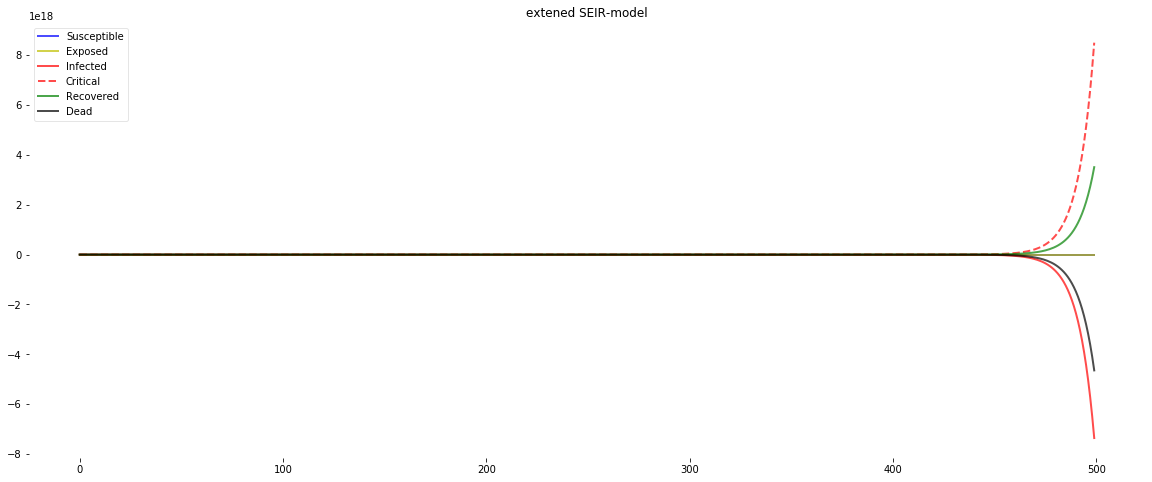

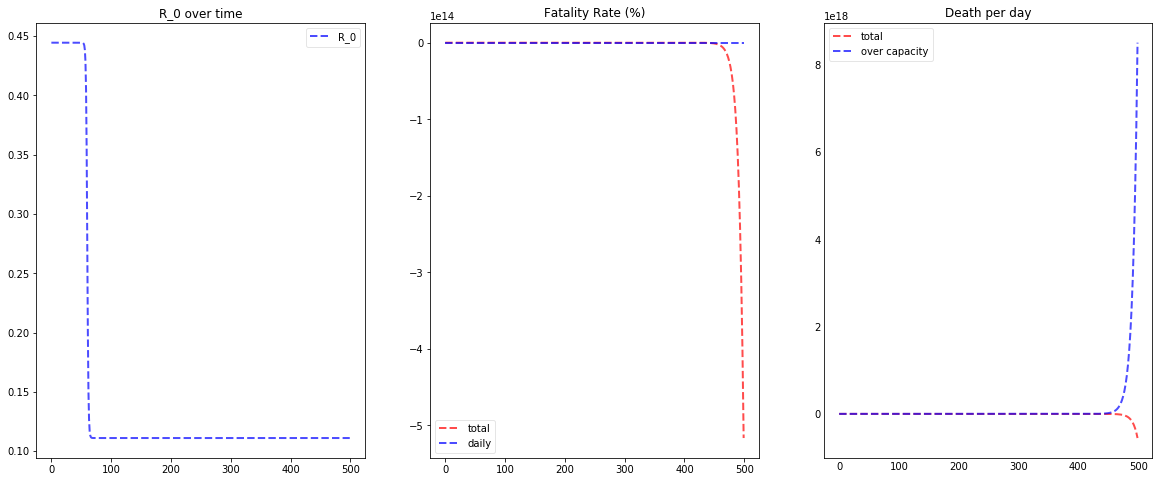

In [38]:
plotter(*Model(days=500, agegroups=[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000], 
               beds_per_100k=50, R_0_start=4.0, k=1.0, x0=60, R_0_end=1.0, 
               prob_I_to_C=0.05, prob_C_to_D=0.6, s=0.003))

范例中的数据截止到4月20日，拟合效果好，具有阶段性

In [40]:
# parameters
data = covid_data[covid_data["Location"] == "Italy"]["Value"].values[::-1]
agegroups = agegroups_lookup["Italy"]
beds_per_100k = beds_lookup["Italy"]
outbreak_shift = 30
params_init_min_max = {"R_0_start": (3.0, 2.0, 5.0), "k": (2.5, 0.01, 5.0), "x0": (90, 0, 120), "R_0_end": (0.9, 0.3, 3.5),
                       "prob_I_to_C": (0.05, 0.01, 0.1), "prob_C_to_D": (0.5, 0.05, 0.8),
                       "s": (0.003, 0.001, 0.01)}  # form: {parameter: (initial guess, minimum value, max value)}

In [41]:
days = outbreak_shift + len(data)
if outbreak_shift >= 0:
    y_data = np.concatenate((np.zeros(outbreak_shift), data))
else:
    y_data = y_data[-outbreak_shift:]

x_data = np.linspace(0, days - 1, days, dtype=int)  # x_data is just [0, 1, ..., max_days] array

def fitter(x, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s):
    ret = Model(days, agegroups, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s)
    return ret[6][x]

In [42]:
def fitter(x, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s):
    ret = Model(days, agegroups, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s)
    return ret[6][x]

In [43]:
mod = lmfit.Model(fitter)

for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()
fit_method = "leastsq"

In [44]:

result = mod.fit(y_data, params, method="least_squares", x=x_data)

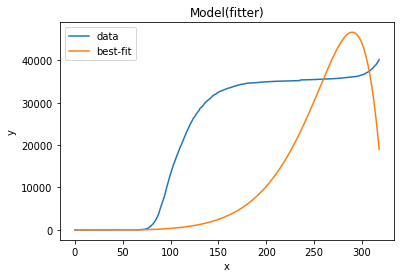

In [45]:
result.plot_fit(datafmt="-")

In [46]:
result.best_values

{'R_0_start': 4.428478124486539,
 'k': 2.547732444070511,
 'x0': 69.24972354523267,
 'R_0_end': 1.0268228842907499,
 'prob_I_to_C': 0.09999999999996725,
 'prob_C_to_D': 0.799944709728879,
 's': 0.0019542919473506453}

Prediction for Italy
perventage going to ICU: 9.999999999996726; percentage dying in ICU: 79.9944709728879


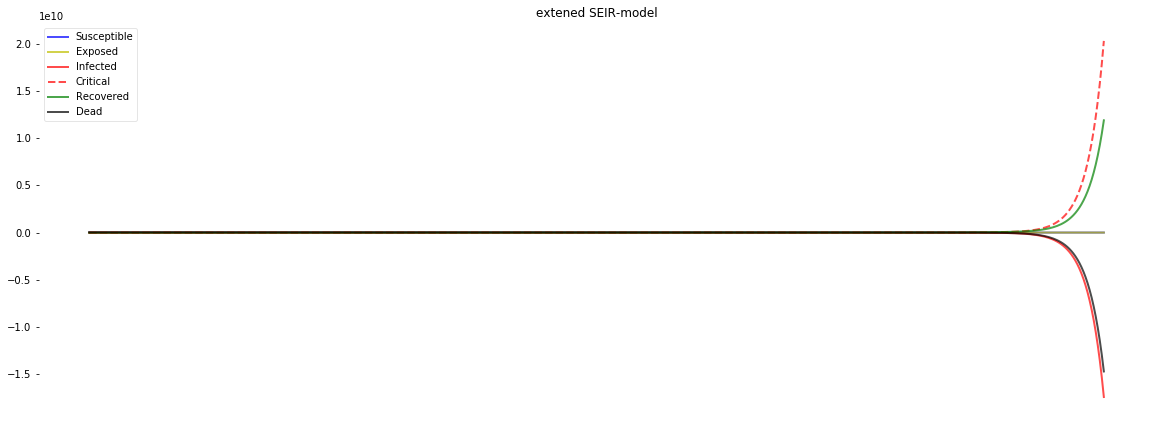

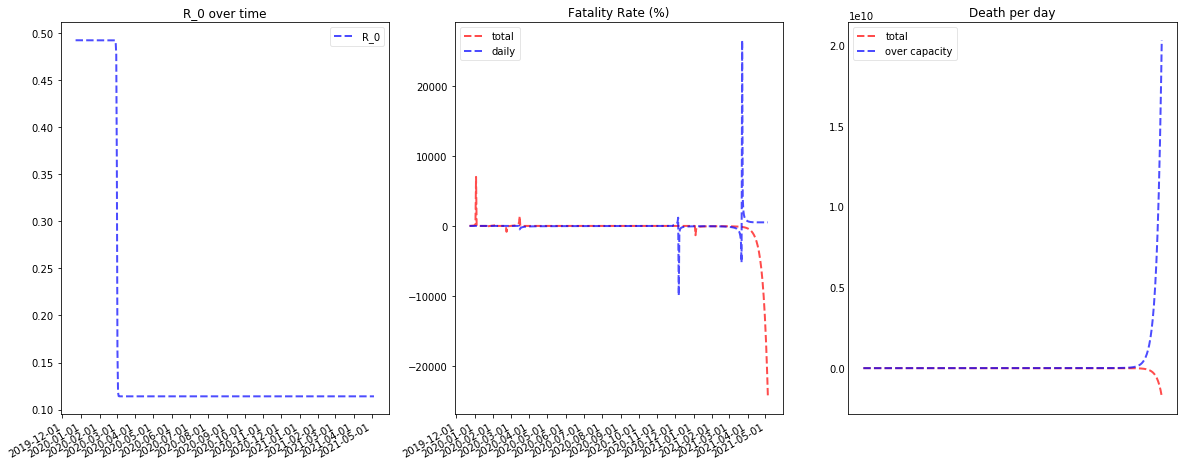

In [48]:
full_days = 500
first_date = np.datetime64(covid_data.Date.min()) - np.timedelta64(outbreak_shift,'D')
x_ticks = pd.date_range(start=first_date, periods=full_days, freq="D")
print("Prediction for Italy")
plotter(*Model(full_days, agegroups_lookup["Italy"], beds_lookup["Italy"], **result.best_values), x_ticks=x_ticks);